Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem 2: Drought Monitor Germany. In this problem we work with data on drought in the topsoil (uppermost 25cm) in Germany between 1951 until 2022, as provided by the the Helmholtz Centre for Environmental Research. The original data is available at https://www. ufz.de/index.php?en=37937. For the exam we provide the data in convenient numpy format in the le drought.npz and a description in drought_description.txt. Some details on the denition of the soil moisture index (SMI) can be found (in German and English) in the original source description.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
import matplotlib.dates as mdates

data = np.load('drought.npz')
month = data['month']
SMI = data['SMI']

# reverse the value in the 2nd dimension to fix the plot orientation, the plot was reversed before.
SMI = SMI[:, ::-1, :]


lat = data['lat']
lat = lat[::-1,:]

lon = data['lon']
lon = lon[::-1, :]

print(f"Shape of SMI data: {SMI.shape}")
print(f"Time range: {month[0]} to {month[-1]} months since January 1951")

Shape of SMI data: (864, 225, 175)
Time range: 0 to 863 months since January 1951


# 2.1(a) Visualize the SMI across Germany as a heatmap / image for a given year and month. Make the plot interactive, such that year and month can be chosen dynamically by the user. Build a similar plot where for a given year the heatmap of the average SMI over this year is shown. (2 charts)

In [4]:
def plot_smi_heatmap(year, month):
    # Calculate the index in the data array
    index = (year - 1951) * 12 + month - 1

    # Create a masked array to handle the fill value
    smi_masked = np.ma.masked_values(SMI[index], -9999)

    plt.figure(figsize=(10, 8))
    plt.imshow(smi_masked, cmap='RdYlBu_r', vmin=0, vmax=1)
    plt.colorbar(label='Soil Moisture Index')
    plt.title(f'Soil Moisture Index - {year}-{month:02d}')
    plt.axis('off')
    plt.show()

# Create interactive widgets
year_widget = widgets.IntSlider(min=1951, max=2022, step=1, value=2000, description='Year:')
month_widget = widgets.IntSlider(min=1, max=12, step=1, value=6, description='Month:')

interact(plot_smi_heatmap, year=year_widget, month=month_widget)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=1951), IntSlider(value=6, descr…

<function __main__.plot_smi_heatmap(year, month)>

In [5]:
def plot_yearly_average_smi(year):
    # Calculate the start and end indices for the year
    start_index = (year - 1951) * 12
    end_index = start_index + 12

    # Calculate the yearly average
    yearly_average = np.mean(SMI[start_index:end_index], axis=0)

    # Create a masked array to handle the fill value
    yearly_average_masked = np.ma.masked_values(yearly_average, -9999)

    plt.figure(figsize=(10, 8))
    plt.imshow(yearly_average_masked, cmap='RdYlBu_r', vmin=0, vmax=1)
    plt.colorbar(label='Average Soil Moisture Index')
    plt.title(f'Average Soil Moisture Index - {year}')
    plt.axis('off')
    plt.show()

# Create interactive widget for year selection
year_widget = widgets.IntSlider(min=1951, max=2022, step=1, value=2000, description='Year:')

interact(plot_yearly_average_smi, year=year_widget)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=1951), Output()), _dom_classes=…

<function __main__.plot_yearly_average_smi(year)>

# 2.1(b) For better orientation, mark the following cities on the map: Berlin, Cologne, Frank- furt, Göttingen, Hamburg, Leipzig, Munich, Stuttgart. To determine the location of a city on the heatmap, use the latitude and longitude arrays of the dataset, and simply place each city on the grid cell with the most similar latitude and longitude coordinates. Make sure that the names of the cities can be inferred form the plot. (1 chart, or add to previous charts)

In [6]:
cities = {
    'Berlin': (52.52, 13.40),
    'Cologne': (50.94, 6.96),
    'Frankfurt': (50.11, 8.68),
    'Göttingen': (51.54, 9.92),
    'Hamburg': (53.55, 10.00),
    'Leipzig': (51.34, 12.37),
    'Munich': (48.14, 11.58),
    'Stuttgart': (48.78, 9.18)
}

def plot_smi_heatmap_with_cities(year, month):
    index = (year - 1951) * 12 + month - 1
    smi_masked = np.ma.masked_values(SMI[index], -9999)

    plt.figure(figsize=(12, 10))
    plt.imshow(smi_masked, cmap='RdYlBu_r', vmin=0, vmax=1)
    plt.colorbar(label='Soil Moisture Index')
    plt.title(f'Soil Moisture Index - {year}-{month:02d}')

    for city, coords in cities.items():
        y_idx, x_idx = find_nearest_index(lat, coords[0]), find_nearest_index(lon, coords[1])
        plt.plot(x_idx[1], y_idx[0], 'ko', markersize=5)  # Use the correct indices
        plt.annotate(city, (x_idx[1], y_idx[0]), xytext=(5, 5), textcoords='offset points')

    plt.axis('off')
    plt.show()

# Modify the find_nearest_index function to return single values
def find_nearest_index(array, value):
    idx = np.unravel_index(np.abs(array - value).argmin(), array.shape)
    return idx

interact(plot_smi_heatmap_with_cities, year=year_widget, month=month_widget)

interactive(children=(IntSlider(value=2000, description='Year:', max=2022, min=1951), IntSlider(value=6, descr…

<function __main__.plot_smi_heatmap_with_cities(year, month)>

# 2.2(a) For each observed month, compute the average SMI over the whole country (in the following referred to as monthly averages). In addition, for each year, compute the average SMI over the months and the whole country (yearly averages).


In [7]:
# Calculate monthly averages
monthly_averages = np.mean(np.ma.masked_values(SMI, -9999), axis=(1, 2))

# Calculate yearly averages
yearly_averages = monthly_averages.reshape(-1, 12).mean(axis=1)

print("Monthly averages shape:", monthly_averages.shape)
print("Yearly averages shape:", yearly_averages.shape)

Monthly averages shape: (864,)
Yearly averages shape: (72,)


# 2.2(b) Show the yearly averages between 1951 and 2022, visually emphasize the trend in the evolution, and highlight several years of exceptional drought. (1 chart)

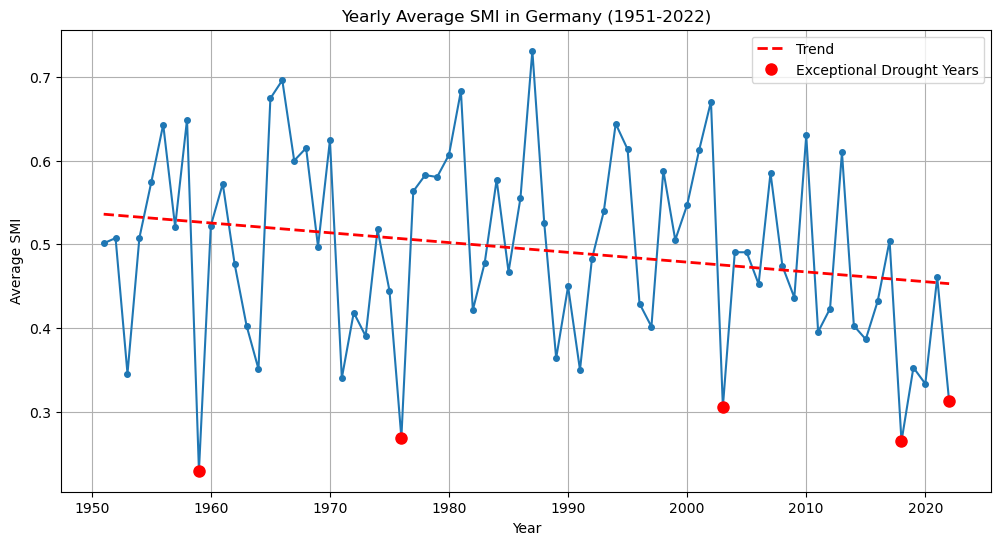

Exceptional drought years: [1959 1976 2003 2018 2022]


In [8]:
# Create a time series for plotting
years = np.arange(1951, 2023)

plt.figure(figsize=(12, 6))
plt.plot(years, yearly_averages, marker='o', linestyle='-', markersize=4)
plt.title('Yearly Average SMI in Germany (1951-2022)')
plt.xlabel('Year')
plt.ylabel('Average SMI')

# Add trend line
z = np.polyfit(years, yearly_averages, 1)
p = np.poly1d(z)
plt.plot(years, p(years), "r--", linewidth=2, label='Trend')

# Highlight exceptional drought years
threshold = np.mean(yearly_averages) - 1.5 * np.std(yearly_averages)
drought_years = years[yearly_averages < threshold]
plt.plot(drought_years, yearly_averages[yearly_averages < threshold], 'ro', markersize=8, label='Exceptional Drought Years')

plt.legend()
plt.grid(True)
plt.show()

print("Exceptional drought years:", drought_years)

# 2.2(c) For all years between 1951 and 2022, show the monthly averages from January to December, with a focus on the exceptionally dry years identified in the previous chart. (1 chart)

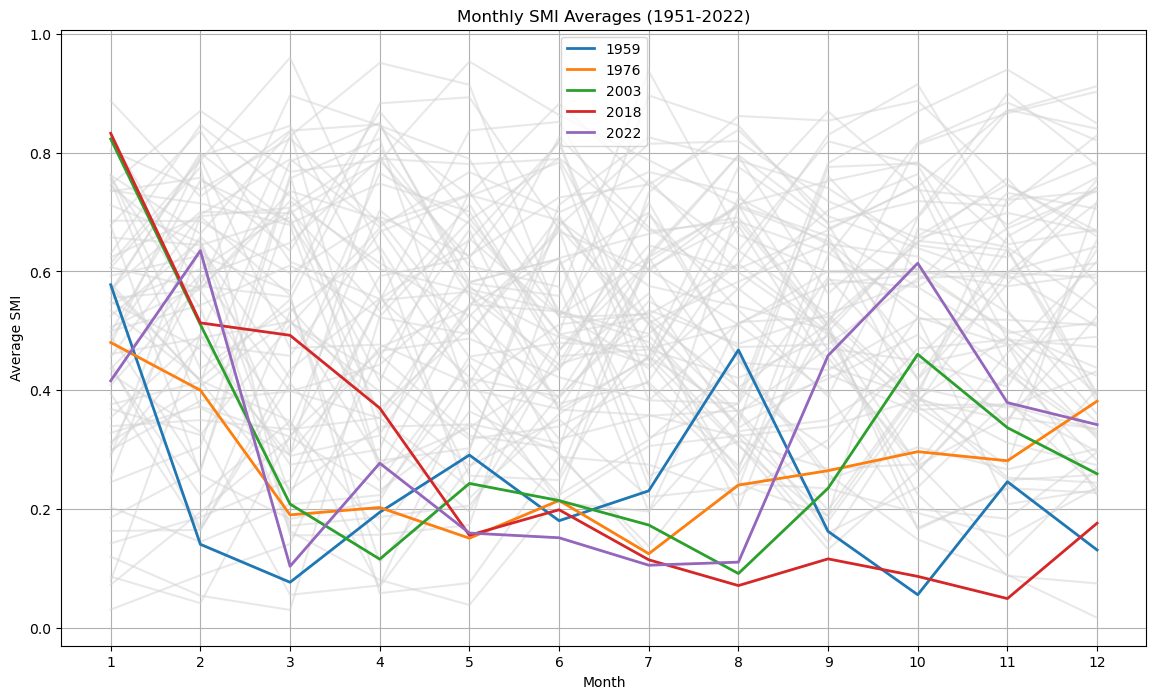

In [9]:
plt.figure(figsize=(14, 8))
months = np.arange(1, 13)

# Plot all years in light gray
for year in range(1951, 2023):
    start_idx = (year - 1951) * 12
    end_idx = start_idx + 12
    plt.plot(months, monthly_averages[start_idx:end_idx], color='lightgray', alpha=0.5)

# Highlight exceptional drought years
for year in drought_years:
    start_idx = (year - 1951) * 12
    end_idx = start_idx + 12
    plt.plot(months, monthly_averages[start_idx:end_idx], linewidth=2, label=f'{year}')

plt.title('Monthly SMI Averages (1951-2022)')
plt.xlabel('Month')
plt.ylabel('Average SMI')
plt.legend()
plt.grid(True)
plt.xticks(months)
plt.show()

# 2.3 Drought thresholds. Researchers have suggested various thresholds of the SMI for the definition of droughts. We adopt the following conventions: or each month determine the fraction of area of Germany that falls within each of these categories (this fraction can be computed via the relative number of pixels of the masked image area). Show these fractions over time. To make the plot more legible, apply some additional aggregation, either by averaging over years, or (more sophisticated) by computing a rolling mean over 12 months. (1-2 charts)

864


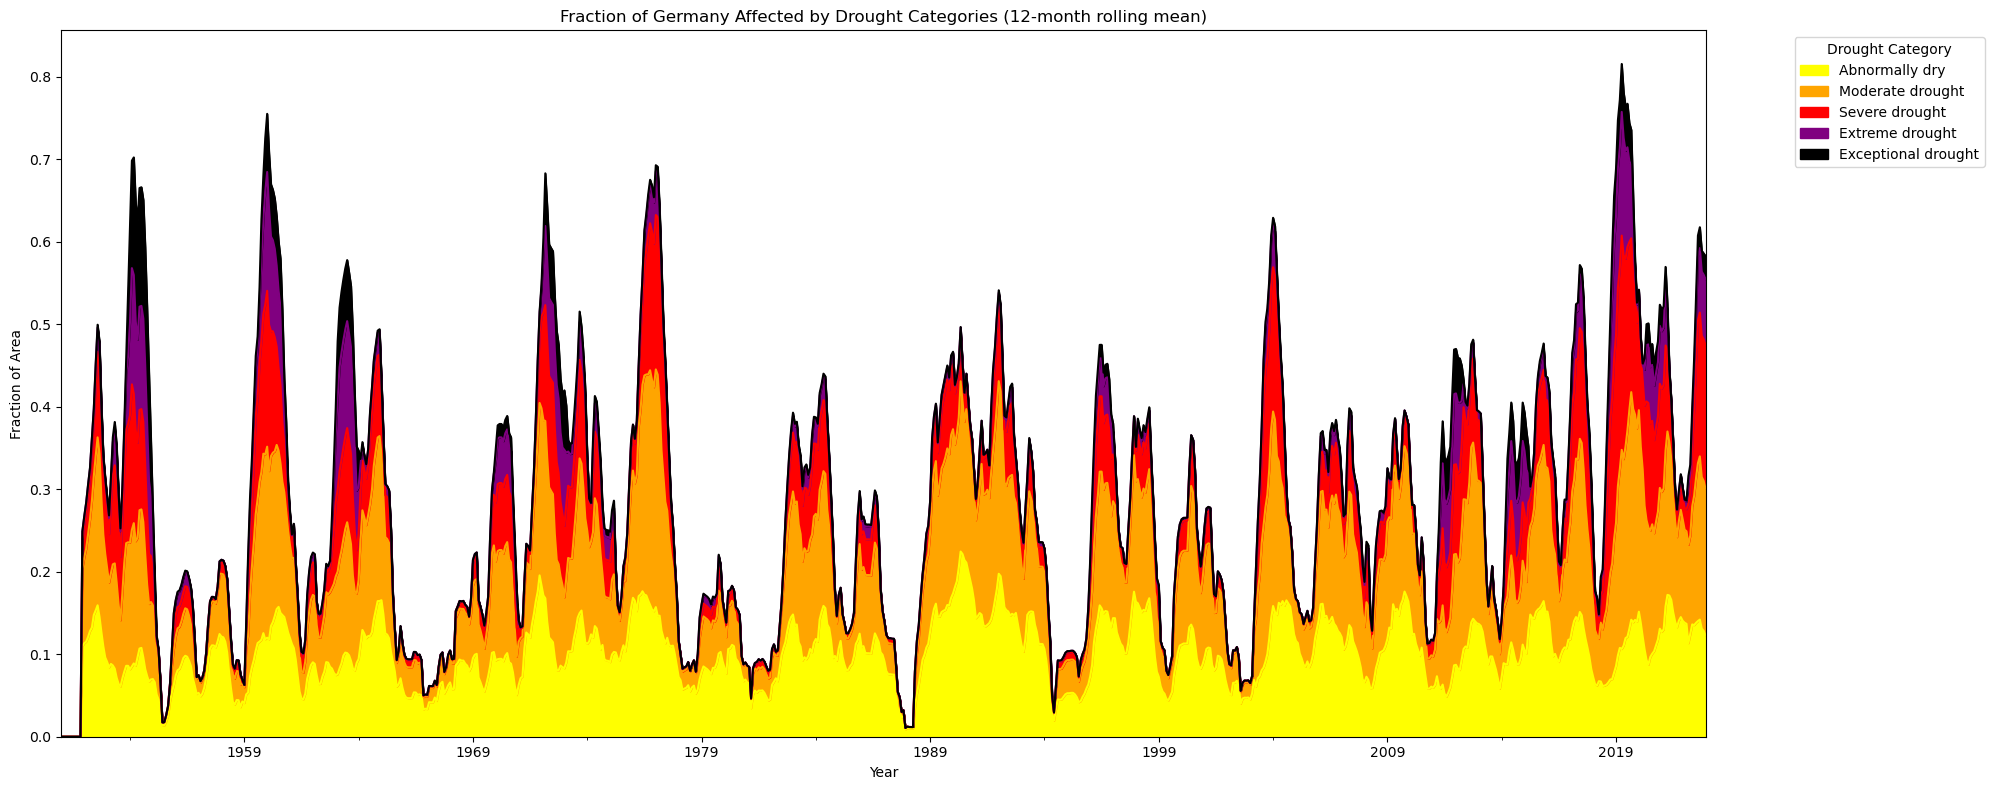

In [31]:

# Assuming fractions is a dictionary with drought category fractions for each month
# Replace with your actual fractions data
drought_categories = [
    (0.20, 0.30, "Abnormally dry"),
    (0.10, 0.20, "Moderate drought"),
    (0.05, 0.10, "Severe drought"),
    (0.02, 0.05, "Extreme drought"),
    (0.00, 0.02, "Exceptional drought")
]

# Calculate fractions for each category
fractions = []
for i in range(SMI.shape[0]):
    smi_month = SMI[i]
    valid_pixels = smi_month[smi_month != -9999]
    total_pixels = len(valid_pixels)

    month_fractions = {category: np.sum((lower < valid_pixels) & (valid_pixels <= upper)) / total_pixels
                       for lower, upper, category in drought_categories}
    fractions.append(month_fractions)

# Convert to DataFrame
df = pd.DataFrame(fractions)

print(len(df))

# Create proper time index
time_index = pd.date_range(start='1951-01-01', periods=len(df), freq='ME')
df.index = time_index

# Calculate 12-month rolling mean
df_rolling = df.rolling(window=12).mean()



# Plot rolling mean
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the width here
colors = ['#FFFF00', '#FFA500', '#FF0000', '#800080', '#000000']

df_rolling.plot.area(stacked=True, color=colors, ax=ax)

plt.title('Fraction of Germany Affected by Drought Categories (12-month rolling mean)')
plt.xlabel('Year')
plt.ylabel('Fraction of Area')
plt.legend(title='Drought Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

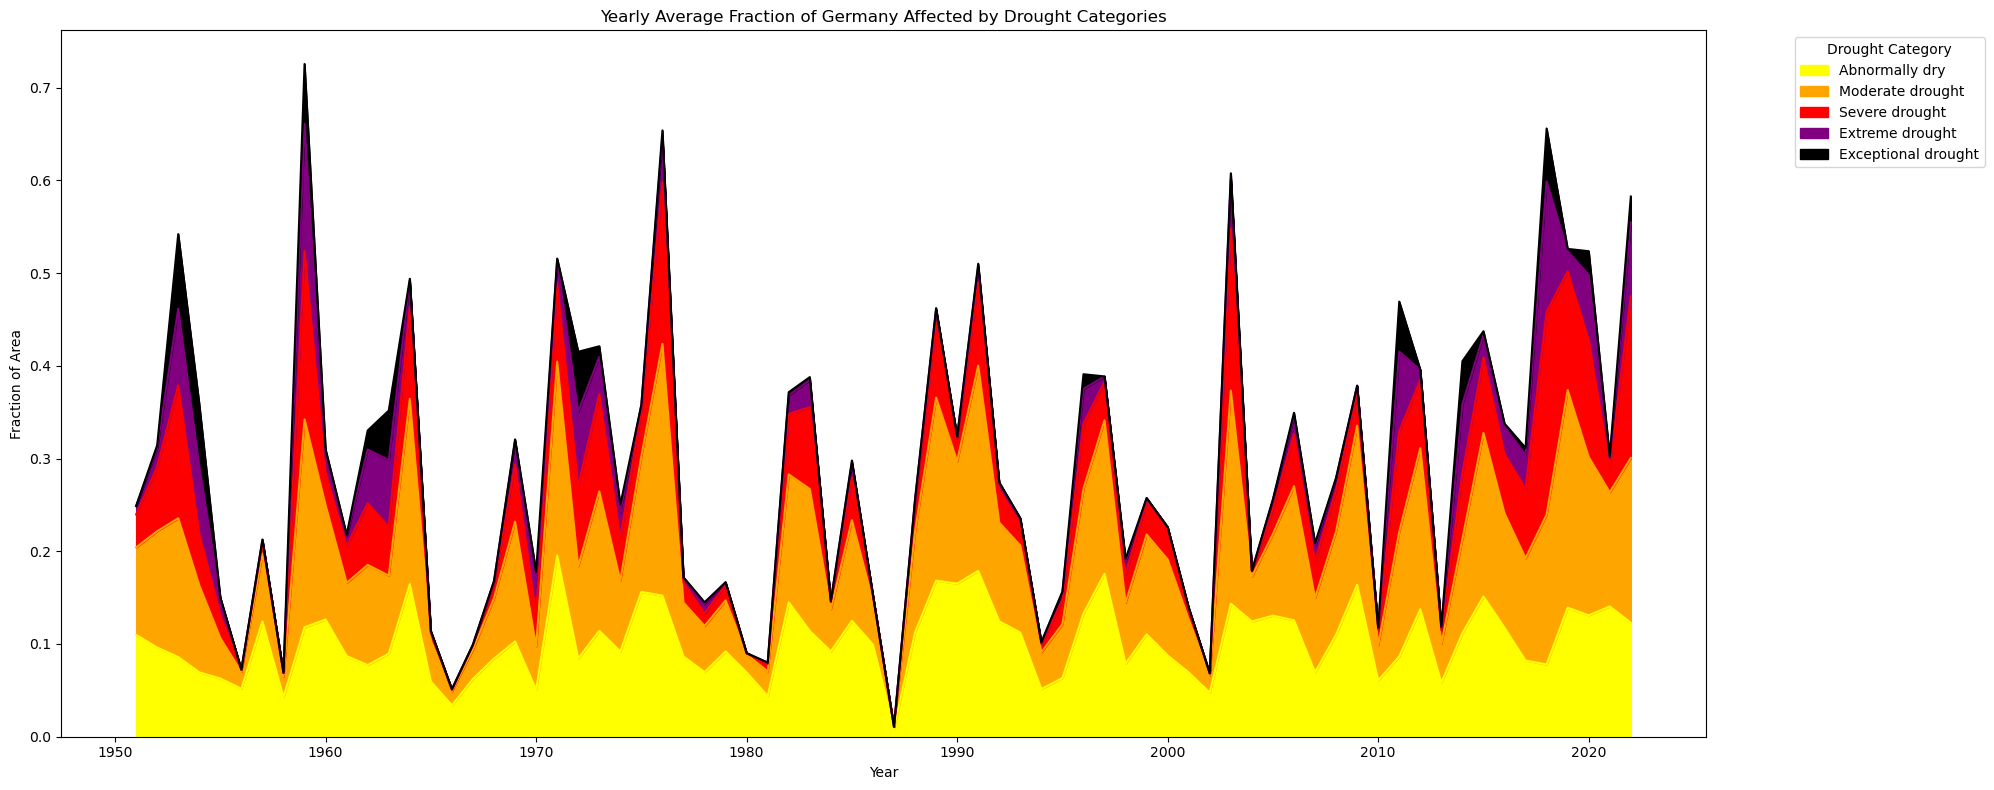

In [32]:

# Yearly averages plot
df_yearly = df.groupby(df.index.year).mean()

plt.figure(figsize=(15, 8))

# Plot rolling mean
fig, ax = plt.subplots(figsize=(20, 8))  # Increase the width here
colors = ['#FFFF00', '#FFA500', '#FF0000', '#800080', '#000000']

df_yearly.plot.area(stacked=True, color=colors, ax=ax)
plt.title('Yearly Average Fraction of Germany Affected by Drought Categories')
plt.xlabel('Year')
plt.ylabel('Fraction of Area')
plt.legend(title='Drought Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

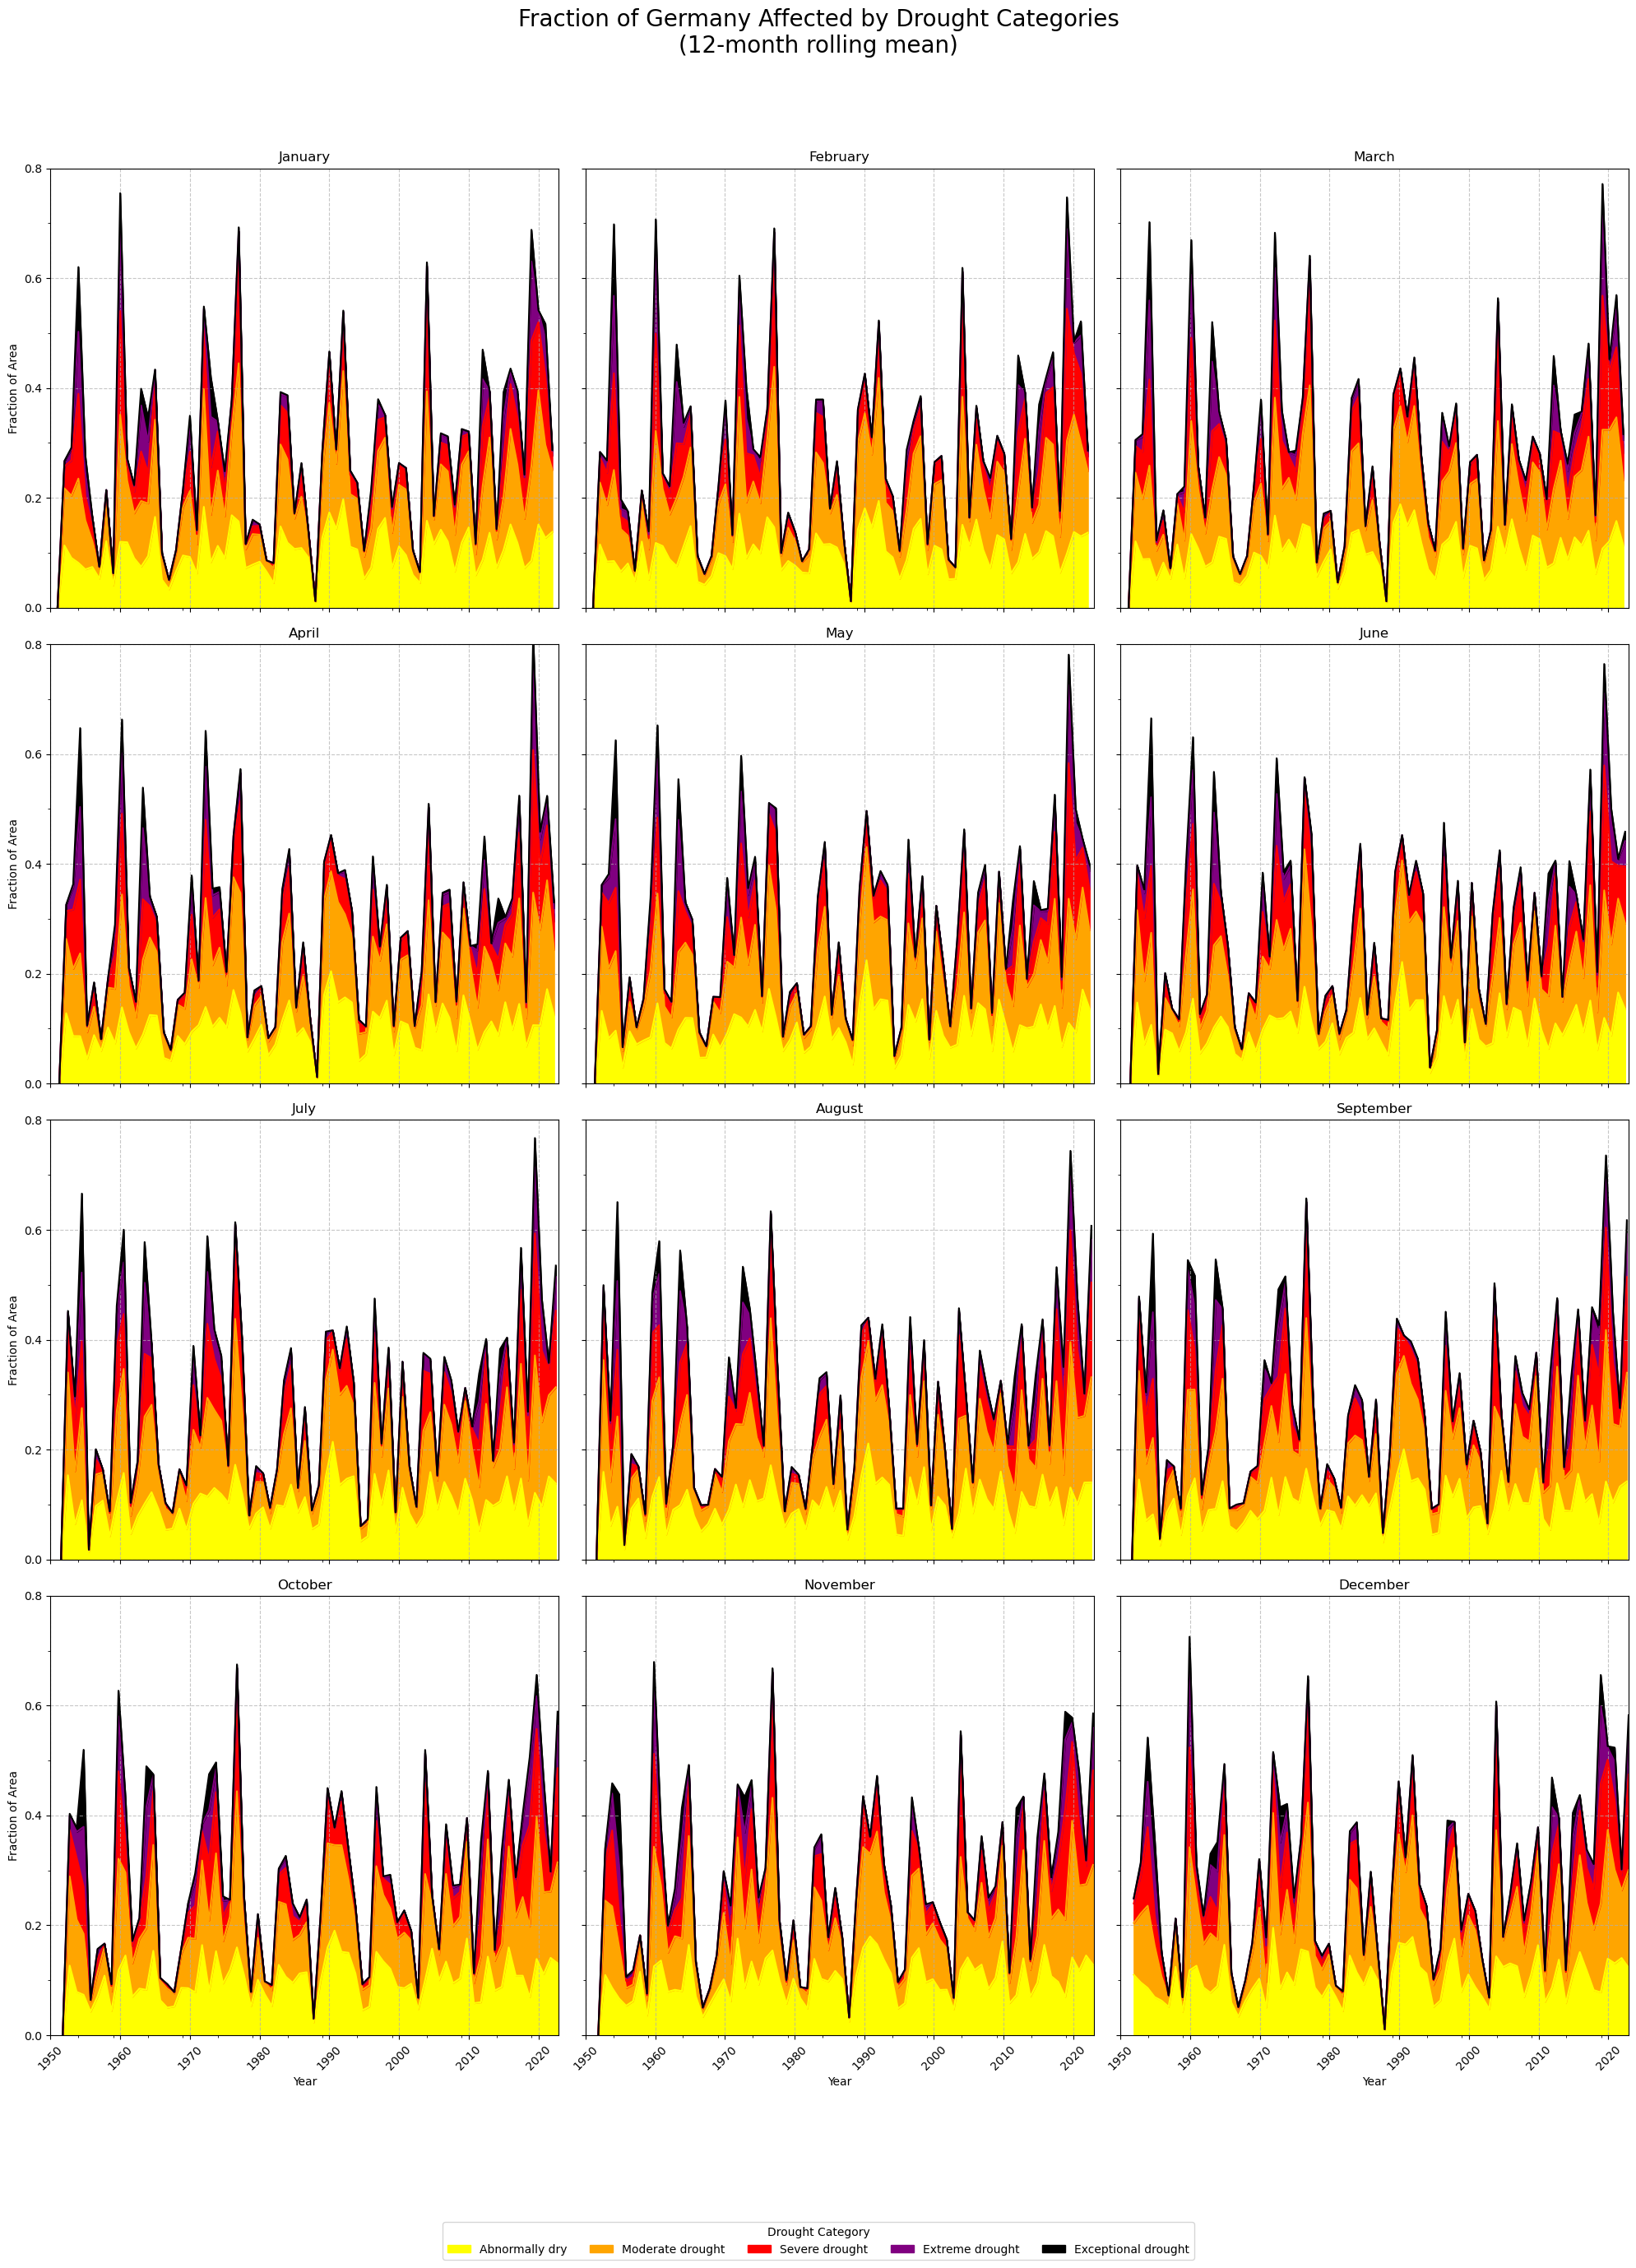

In [33]:
# Calculate 12-month rolling mean
df_rolling = df.rolling(window=12).mean()

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 28), sharex=True, sharey=True)
fig.suptitle('Fraction of Germany Affected by Drought Categories\n(12-month rolling mean)', fontsize=20)

colors = ['#FFFF00', '#FFA500', '#FF0000', '#800080', '#000000']
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

for month, (ax, month_name) in enumerate(zip(axes.flatten(), month_names), 1):
    month_data = df_rolling[df_rolling.index.month == month]
    month_data.plot.area(ax=ax, stacked=True, color=colors, legend=False)

    ax.set_title(month_name, fontsize=12)
    ax.set_ylim(0, 0.8)
    ax.set_yticks(np.arange(0, 0.81, 0.2))
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.7)

    if month in [10, 11, 12]:  # Only show x-label for bottom row
        ax.set_xlabel('Year', fontsize=10)
    if month in [1, 4, 7, 10]:  # Only show y-label for left column
        ax.set_ylabel('Fraction of Area', fontsize=10)

    # Set x-axis ticks and labels
    years = range(1950, 2021, 10)
    ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in years]))
    ax.set_xticklabels(years, rotation=45)

# Create a common legend
handles, labels = axes[0, 0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', ncol=5, title='Drought Category', fontsize=10, bbox_to_anchor=(0.5, 0))

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])

# Adjust the bottom margin to make room for the legend
fig.subplots_adjust(bottom=0.1)

# Display the plot
plt.show()